Goal: investigate an experiment set with 4 factors
===================================================

We have a bioreactor system, and we are investigating four factors:
    
| Factor | Description                  | Low value | High value| Type   |
|--------|------------------------------|-----------|-----------|--------|
| **A**  | Feed rate                    | 500 g/min | 008 g/min |Numeric |
| **B**  | Initial inoculant amount     | 300 g     | 400 g     |Numeric |
| **C**  | feed substrate concentration | 40 g/L    | 60 g/L    |Numeric |
| **D**  | Dissolved oxygen set-point   | 4 mg/L    | 5 mg/L    |Numeric |

The repsonse from each experiment is the *y* = Yield measured in units of g/L.

In [1]:
from process_improve import *
from bokeh.plotting import output_notebook
output_notebook()

Loading BokehJS ...

In [2]:
# Create the 4 factors, in a full factorial
A, B, C, D = full_factorial(4, names=['A', 'B', 'C', 'D'])
    
# Look what A, B, C, and D look like:
print(A)

1    -1.0
2     1.0
3    -1.0
4     1.0
5    -1.0
6     1.0
7    -1.0
8     1.0
9    -1.0
10    1.0
11   -1.0
12    1.0
13   -1.0
14    1.0
15   -1.0
16    1.0
Name: A, dtype: float64


In [3]:
# Add some additional information to the vector (it is useful in the plots)

A = supplement(A, name='Feed rate',                    units='g/min', lo = 5, high = 8.0)
B = supplement(B, name='Initial inoculant amount',     units='g', lo = 300, hi = 400)
C = supplement(C, name='Feed substrate concentration', units='g/L', lo = 40, hi = 60)
D = supplement(D, name='Dissolved oxygen set-point',   units='mg/L', lo = 4, hi = 5)

print(A)

1    -1.0
2     1.0
3    -1.0
4     1.0
5    -1.0
6     1.0
7    -1.0
8     1.0
9    -1.0
10    1.0
11   -1.0
12    1.0
13   -1.0
14    1.0
15   -1.0
16    1.0
Name: Feed rate [g/min], dtype: float64


In [4]:
# After the experiments are finished, add the response values:
y = c(60, 59, 63, 61, 69, 61, 94, 93, 56, 63, 70, 65, 44, 45, 78, 77, units='g/L', name = 'Yield')

In [5]:
# Linear model using all factors to predict the response
expt = gather(A=A, B=B, C=C, D=D, y=y, title='Initial experiments; full factorial')
expt

,A,B,C,D,y
1,-1.0,-1.0,-1.0,-1.0,60.0
2,1.0,-1.0,-1.0,-1.0,59.0
3,-1.0,1.0,-1.0,-1.0,63.0
4,1.0,1.0,-1.0,-1.0,61.0
5,-1.0,-1.0,1.0,-1.0,69.0
6,1.0,-1.0,1.0,-1.0,61.0
7,-1.0,1.0,1.0,-1.0,94.0
8,1.0,1.0,1.0,-1.0,93.0
9,-1.0,-1.0,-1.0,1.0,56.0
10,1.0,-1.0,-1.0,1.0,63.0


In [6]:
model1_yield = lm("y ~ A*B*C*D", expt)
summary(model1_yield);

         OLS Regression Results: Initial experiments; full factorial          
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                     0.000
Date:                Thu, 10 Oct 2019   Prob (F-statistic):                nan
Time:                        11:24:48   Log-Likelihood:                 468.12
No. Observations:                  16   AIC:                            -904.2
Df Residuals:                       0   BIC:                            -891.9
Residual std error                ---                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     66.1250        inf          0        nan         nan         nan
A             -0.6250        inf         -0        n

Interpretation of the model 
----------------------------------------

* There are __  2-factor interactions in this full factorial.
* There are __  3-factor interactions in this full factorial.
* There are __  4-factor interactions in this full factorial.
* There are a total of ___ coefficients in the linear model, including the interacept.
* There are ___ data points to fit this model.
* The expected $R^2$ value is therefore: ___
* The standard error will be exactly: ________

* Factors which have the greatest influence on the yield are:
 1. ___
 2. ___
 3. ___


In [17]:
# Pareto plot
pareto_plot(model1_yield, plot_width=800);

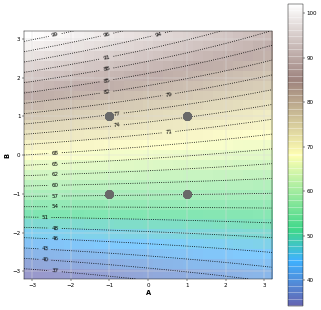

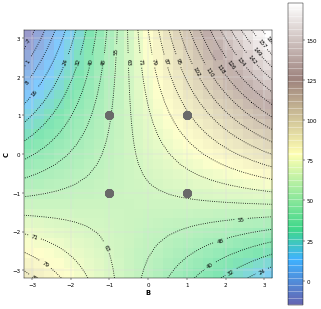

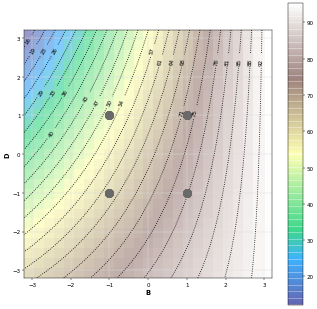

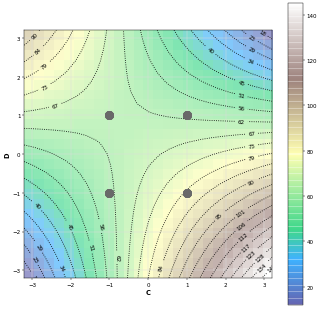

In [20]:
# Contour plots
contour_plot(model1_yield, "A", "B", dpi=40)
contour_plot(model1_yield, "B", "C", dpi=40)
contour_plot(model1_yield, "B", "D", dpi=40)
contour_plot(model1_yield, "C", "D", dpi=40);

Model without the unimportant factor(s)
---------------------------------------

We will remove factor ___ from the model. Why?

In [10]:
reduced = gather(B=B, C=C, D=D, y=y, title='Yield experiments on factors B, C, and Donly')
model2_yield = lm("y ~ B*C*D", reduced)
summary(model2_yield);

     OLS Regression Results: Yield experiments on factors B, C, and Donly     
Dep. Variable:                      y   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     45.54
Date:                Thu, 10 Oct 2019   Prob (F-statistic):           8.02e-06
Time:                        11:24:49   Log-Likelihood:                -34.846
No. Observations:                  16   AIC:                             85.69
Df Residuals:                       8   BIC:                             91.87
Residual std error              3.021                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     66.1250      0.755     87.561      0.000      64.384      67.866
B              9.0000      0.755     11.918      0.0

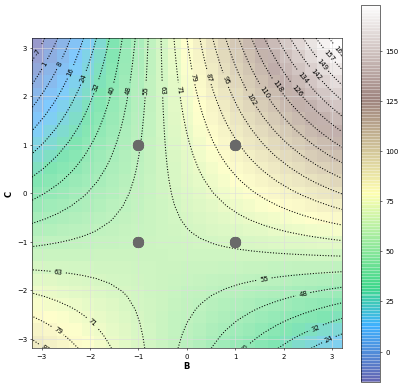

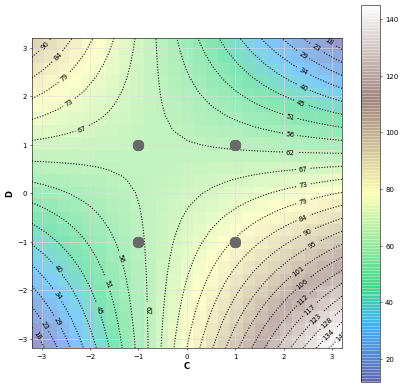

In [11]:
contour_plot(model2_yield, "B", "C", dpi=50)
contour_plot(model2_yield, "C", "D", dpi=50);

In [12]:
print(models.predict(model1_yield, A=1, B=1, C=+2, D=-2))
print(models.predict(model2_yield, B=1, C=+2, D=-2))

0    122.0
dtype: float64
0    122.625
dtype: float64
